**Описание проекта** 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**

**Шаг 1.** 

Откроем файл с данными и изучим общую информацию.
 
**Шаг 2. Подготовим данные**
- Заменим названия столбцов;
- Преобразуем данные в нужные типы;
- Обработаем пропуски;
- Опишем причины, которые могли привести к пропускам;
- Посчитаем суммарные продажи во всех регионах.

**Шаг 3. Проведем исследовательский анализ данных**
- Посмотрим, сколько игр выпускалось в разные годы;
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой срок появляются новые и исчезают старые платформы?;
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов;
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ;
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами;
- Соотнесем выводы с продажами игр на других платформах;
- Посмотрим на общее распределение игр по жанрам.

**Шаг 4. Составим портрет пользователя каждого региона**

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?.
  
**Шаг 5. Проверим гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 6. Сделаем общий вывод**

**Шаг 1. Откроем файл с данными и изучим общую информацию.**

Подключим библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
from scipy import stats as st

Откроем файл с данными

In [2]:
data = pd.read_csv('/datasets/games.csv')

Выведем первые 10 строк датасета

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим информацию о таблице

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на количество пустых значений

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Рассмотрим каждый столбец в котором имеются пустые значения отдельно

In [6]:
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data[data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
data[data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
data[data['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data[data['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на количество дубликатов

In [11]:
data.duplicated().sum()

0

**Вывод**

В столбцах Critic_Score, User_Score и Rating много пропущенных значений, и они практически одинаковые во всех строках. Есть предположение, что для игр со старым годом релиза еще не существовало платформ которые освещали игры, а отсюда и не было критиков которые официально ставили свои оценки (ведь их нужно было где-то размещать). 

Есть пропуски в годах, в которых по моему мнению уже были платформы которые освещали игры. Возможно, они просто остались без оценки критиков и пользователей из-за маленьких продаж.

Также, есть пропуски в 2016 году, но это нормально, ведь год еще не прошел. 

Дубликатов нет.

**Шаг 2. Подготовка данных**

Приведем к нижнему регистру данных категориальных столбцов и названия всех столбцов.

In [12]:
data.columns = data.columns.str.lower()
for column in data[['name', 'platform', 'genre', 'rating']]:
    data[column] = data[column].str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Поработаем со столбцом name.

In [13]:
#Удалим строки без названия игр
data.drop([659, 14244],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Поработаем со столбцом year_of_release. Поменяем тип данных и попробуем восполнить пустые значения.

In [14]:
#Поменяем тип данных в int64 (год - это целое число)
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [15]:
#Посмотрим на одну из игр с пропущенным годом и проверим, была ли она выпущена на других платформах и пропущены ли там значения
data.query('name == "fifa soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
2606,fifa soccer 2004,xb,2003,sports,0.24,0.49,0.00,0.05,82.0,8.2,e
12029,fifa soccer 2004,gc,2003,sports,0.05,0.01,0.00,0.00,83.0,6.2,e
13086,fifa soccer 2004,gba,2003,sports,0.04,0.01,0.00,0.00,82.0,7.9,e


In [16]:
#Напишем цикл и попробуем поменять пропущенные значения года выпуска игр на значения выпуска игр с других платформ
for i in data[data['year_of_release'].isnull() == True].index:
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [17]:
#Посмотрим сколько осталось пустых значений
data['year_of_release'].isna().sum()

146

In [18]:
#Так как мы не сможем анализировать игр без даты релиза - удалим строки без даты релиза
data.drop(data[data['year_of_release'].isna()].index, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Поработаем со столбцом user_score. Поменяем тип данных и попробуем восполнить пустые значения.

In [19]:
#Посмотрим на значения столбца
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим значение "tbd". Это аббревиатура to be determined - означает, что недостаточно количество отзывов для подсчета оценки.

In [20]:
#Заменим 'tbd' на NaN и поменяем тип данных на float64 (ведь оценка может быть не целым числом)
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Поработаем со столбцами critic_score, user_score, rating. 
Так как мы не можем брать ни среднее, ни медианнное значение (т.к. данных исказятся), мы присвоим пропускам отдельные значения. nr = no rating.

In [21]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('nr')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Создадим новый столбец с суммой продаж каждой игры по всем регионам total_sales

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,nr,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,nr,31.38


**Вывод**

- Все столбцы привели к нижнему регистру. 
- Заполнили пропуски где было возможно. Где было невозможно - заполнили отдельными значениями чтобы не терять половину данных.
- Удалили строки где не удалось восстановить год релиза.
- Удалили 2 строки без названия игры.
- Добавили столбец с суммой продаж каждой игры по всем регионам.

Частые пропуски встречаем в играх, которые вышли довольно давно. Возможно тогда еще не существовало компаний которые вели рейтинги и оценки по играм. Пропуски в более свежих играх - скорее всего связаны с маленьким количеством оценок.

In [23]:
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

**Шаг 3. Проведем исследовательский анализ данных**

**Посмотрим, сколько игр выпускалось в разные годы**

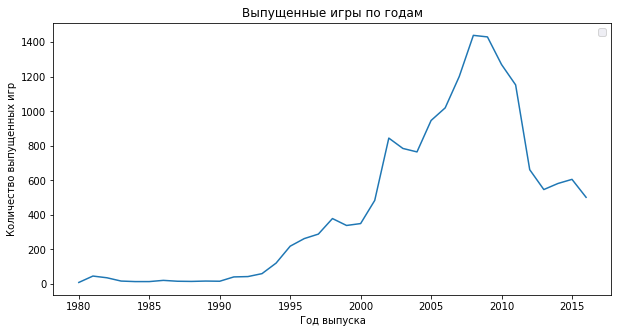

In [24]:
year_of_release_plot = pd.pivot_table(data, index = 'year_of_release', values = 'name', aggfunc = 'count')
plt.figure(figsize = (10,5))
sb.lineplot(data = year_of_release_plot)
sb.set_style('darkgrid')
plt.title("Выпущенные игры по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

По графику можно сделать вывод о том, что до 90-тых годов практически не выпускалось игр, т.к. это было что-то новое, не популярное, и почти не существовало игровых приставок и компьютеров.
С 90-тых годов и вплоть до 2008 года (пик количества выпущенных игр) был большой рост выпущенных игр. Возможно это связано с развитием и выпуском новых игровых приставок и компьютеров, а также развитием интернета и технологий в целом.
После 2008 года видим спад по выпуску игры на игровые приставки и компьютеры, думаю это связано с началом развития мобильных платформ.

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.**

Text(0, 0.5, 'Количество продаж')

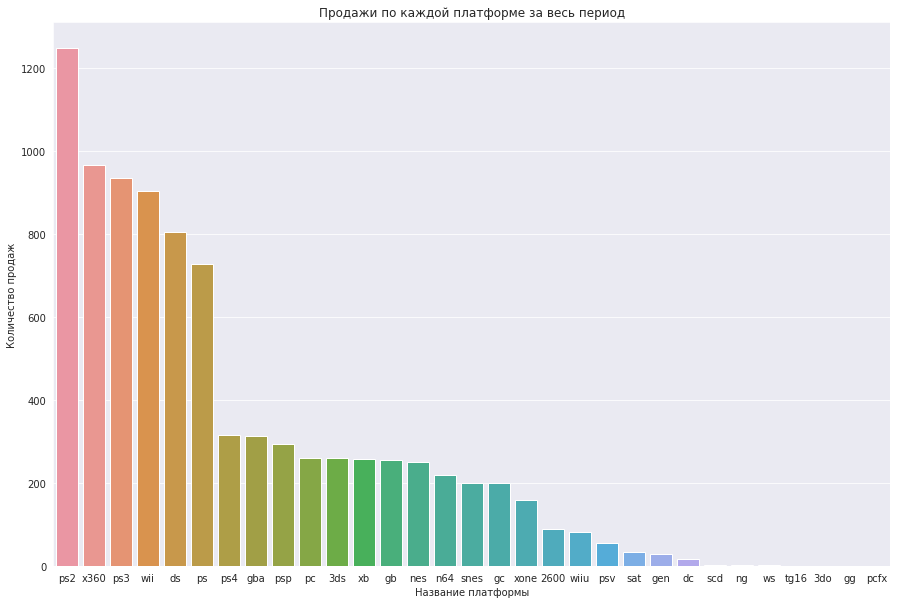

In [25]:
all_sales_platform = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
plt.figure(figsize = (15,10))
sb.barplot(x = all_sales_platform.index, y = all_sales_platform['total_sales'])
plt.title("Продажи по каждой платформе за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

In [26]:
#Выведем в отдельную таблицу 6 лучших платформ, их продажи по всем регионам за все время
top6_platforms_alltime = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top6_platforms_alltime = top6_platforms_alltime.head(6).reset_index().rename_axis(None, axis = 1)
top6_platforms_alltime

,platform,total_sales
0,ps2,1247.16
1,x360,966.61
2,ps3,935.19
3,wii,903.31
4,ds,804.28
5,ps,727.58


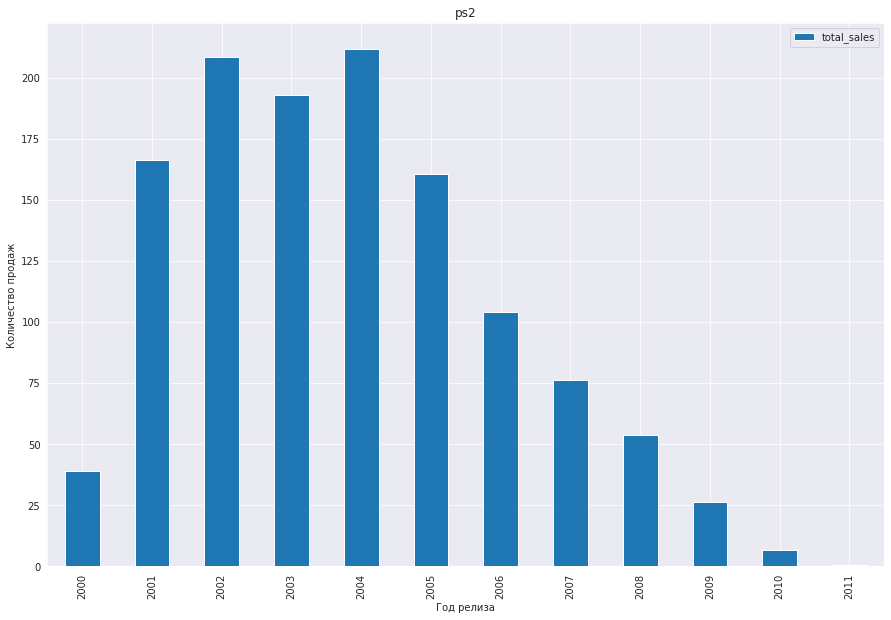

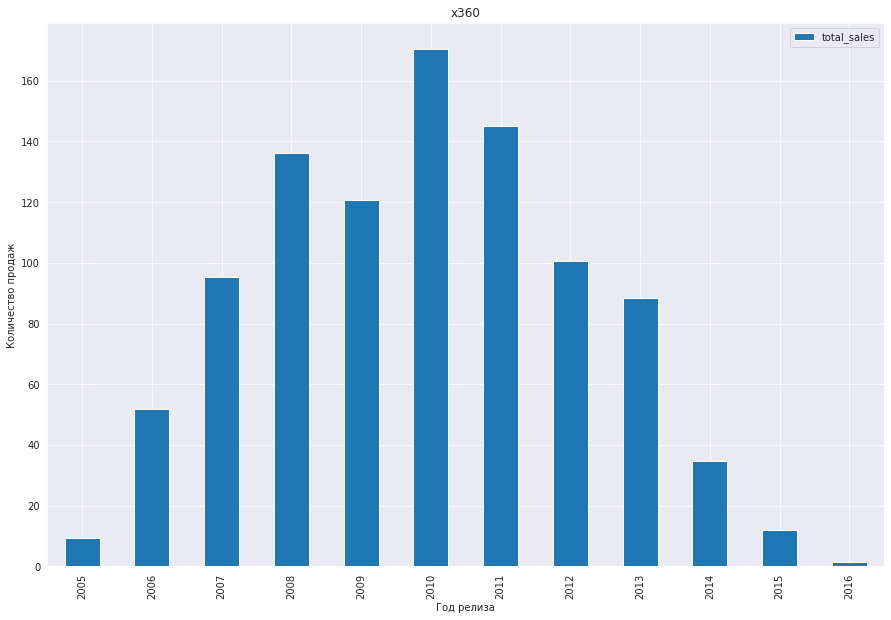

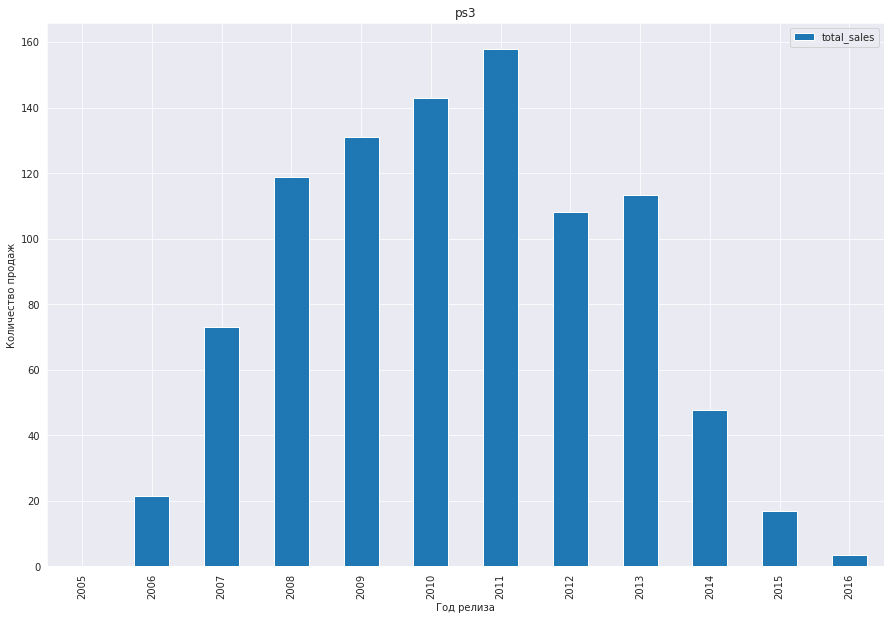

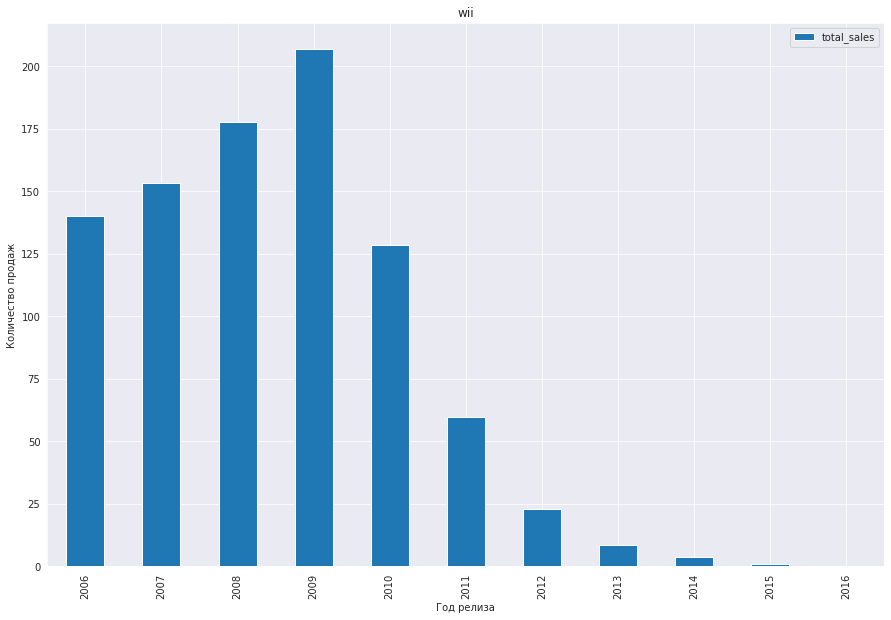

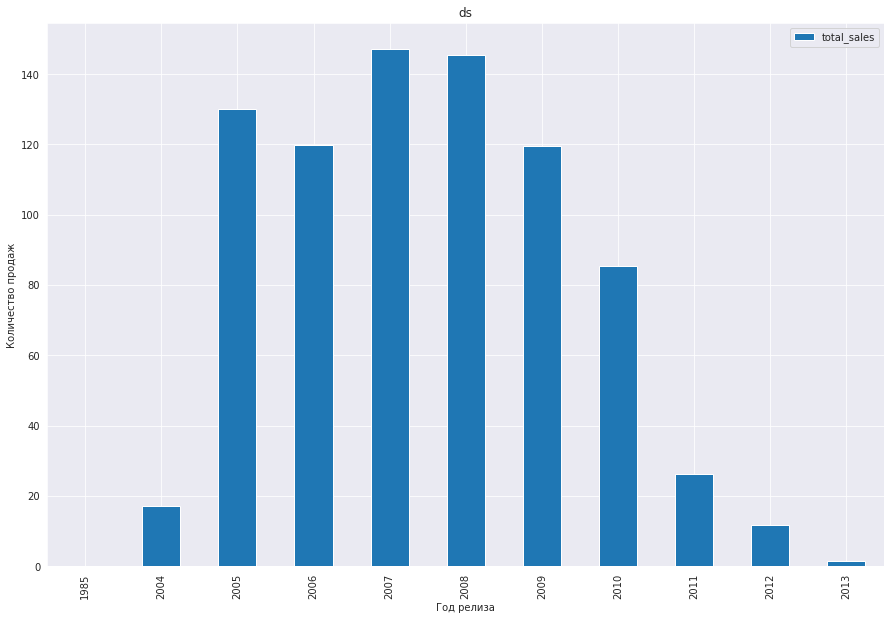

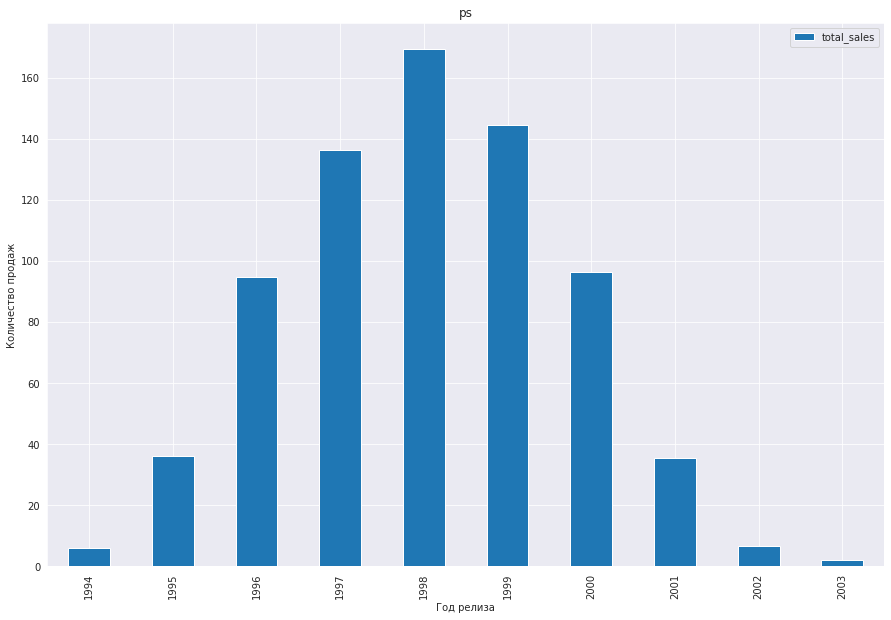

In [27]:
#Построит столбчатые диаграммы для каждой из 6 лучших платформ и посмотрим продажи по годам
for platform in list(top6_platforms_alltime['platform']):
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,10))
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Количество продаж')

**Вывод**

- Самые популярные платформы за весь период - ps2, x360, ps3, wii, ds, ps; 
- Срок жизни каждой консоли примерно 8-10 лет.

**Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов.
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ**

**Мы взяли актуальные данные за период с 2014 года. Далее работаем только с ними.**

In [28]:
#Сделаем выборку с 2014 года и запишем ее в отдельную датафрейм
total_sales_platform = data.query('year_of_release > 2013')
total_sales_platform = total_sales_platform.reset_index().rename_axis(None, axis = 1)
total_sales_platform

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,nr,14.63
1,42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
2,47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,nr,11.68
3,77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
4,87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,nr,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,nr,0.01
1686,16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1.0,-1.0,nr,0.01
1687,16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,nr,0.01
1688,16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,nr,0.01


In [29]:
#Выведем в отдельную таблицу 5 лучших платформ, их продажи по всем регионам с годом релиза начиная с 2014
top5_platforms_after_2013 = total_sales_platform.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top5_platforms_after_2013 = top5_platforms_after_2013.head(5).reset_index().rename_axis(None, axis = 1)
top5_platforms_after_2013

,platform,total_sales
0,ps4,288.15
1,xone,140.36
2,3ds,86.68
3,ps3,68.18
4,x360,48.22


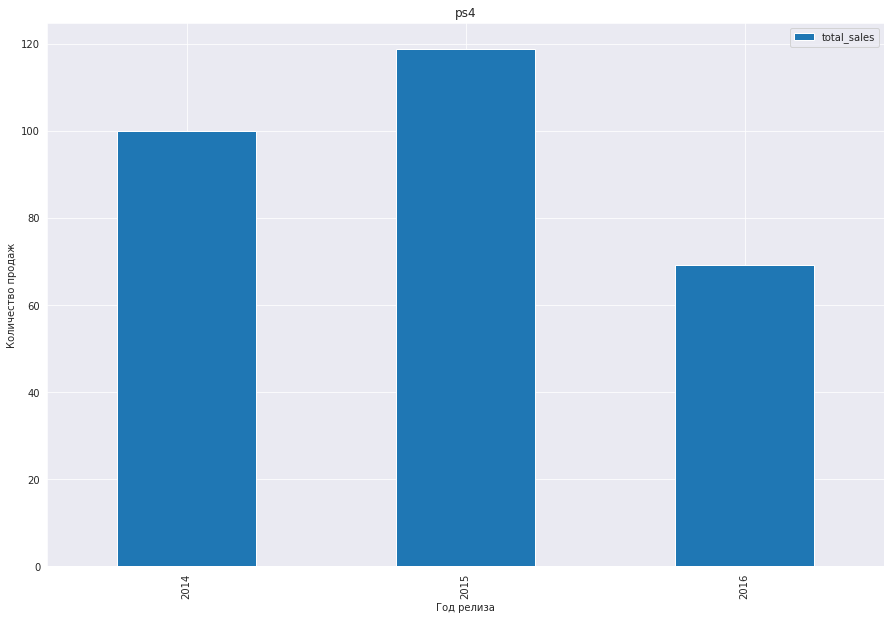

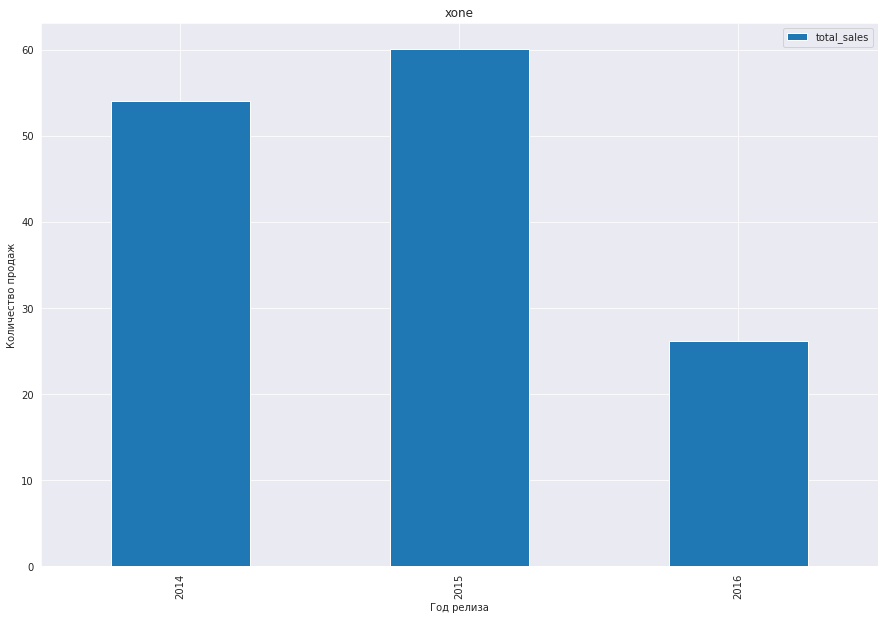

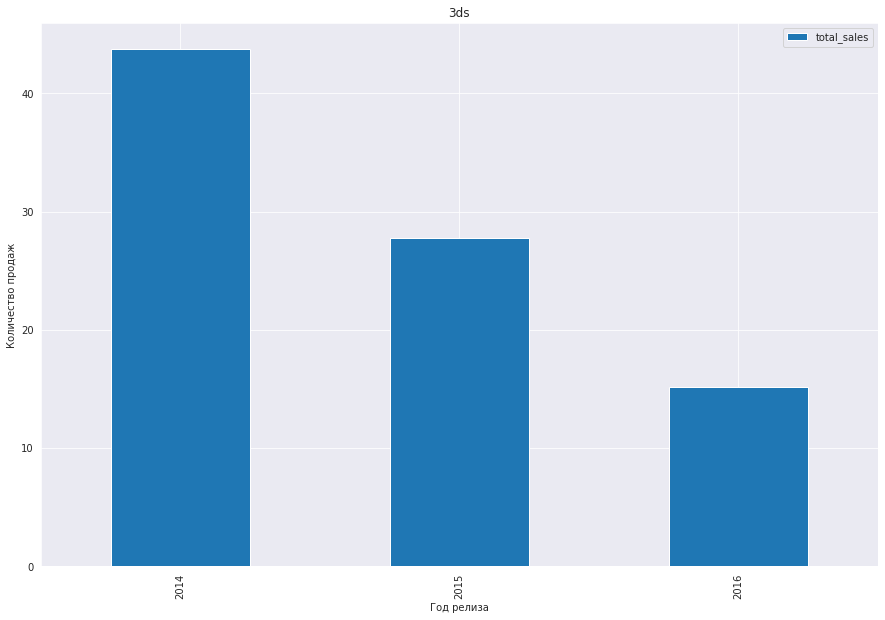

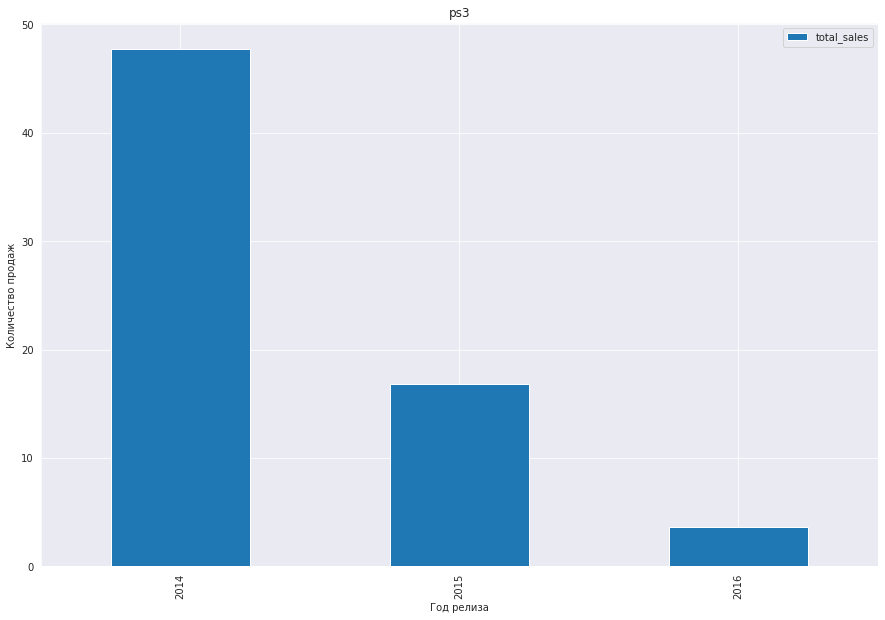

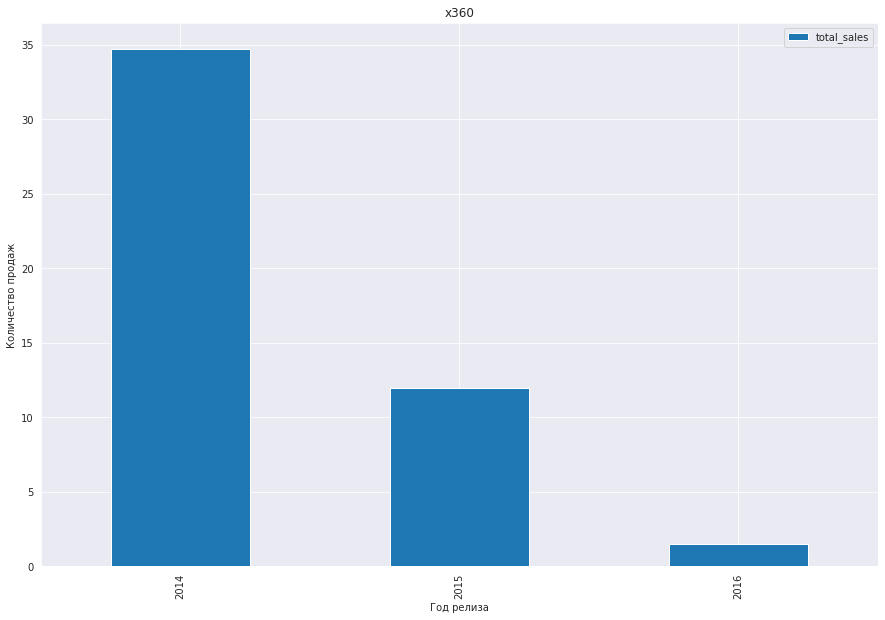

In [30]:
#Сделаем линейные графики по 5 лучшим платформам по продажам начиная с 2014 года
for platform in list(top5_platforms_after_2013['platform']):
    total_sales_platform[total_sales_platform['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,10))
    plt.title(platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Количество продаж')
    

**Вывод** 

- Самые продаваемые игры для ps4 и xone, они являются потенциально прибыльными;
- Старые платформы теряют популярность, скорее всего это связано с выходом консолей нового поколения и возможно с большой популярностью мобильной платформы.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

Text(0, 0.5, 'Продажи всего')

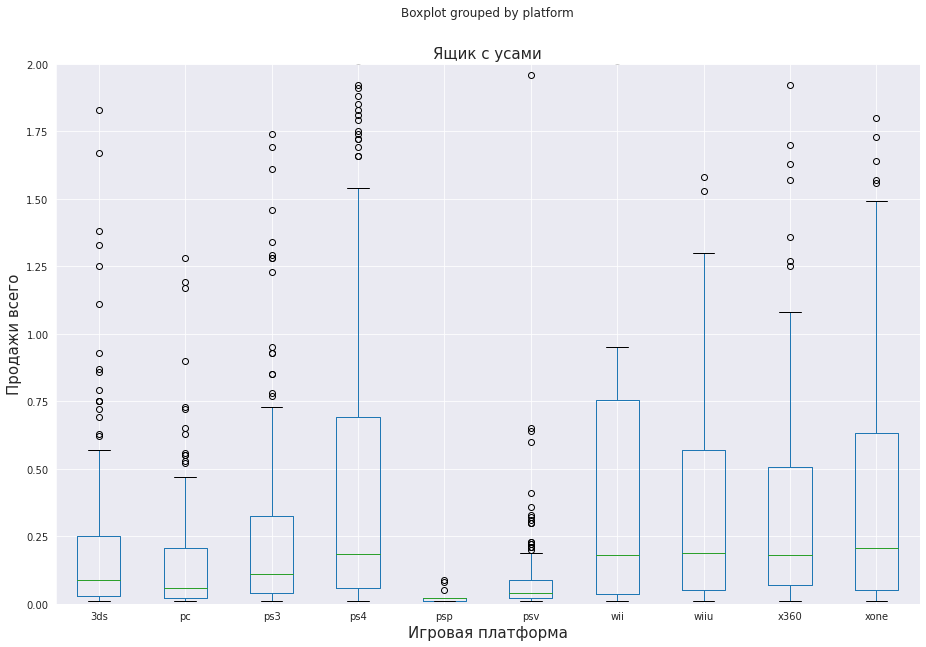

In [31]:
#Рисуем «ящик с усами» используя датафрейм total_sales_platform  со срезом с 2014 года
total_sales_platform.boxplot(column = 'total_sales', by = 'platform', figsize = (15,10))
plt.ylim(0, 2)
plt.title('Ящик с усами', fontsize = 15)
plt.xlabel('Игровая платформа', fontsize = 15)
plt.ylabel('Продажи всего', fontsize = 15)

14.629999999999999


Text(0, 0.5, 'Продажи всего')

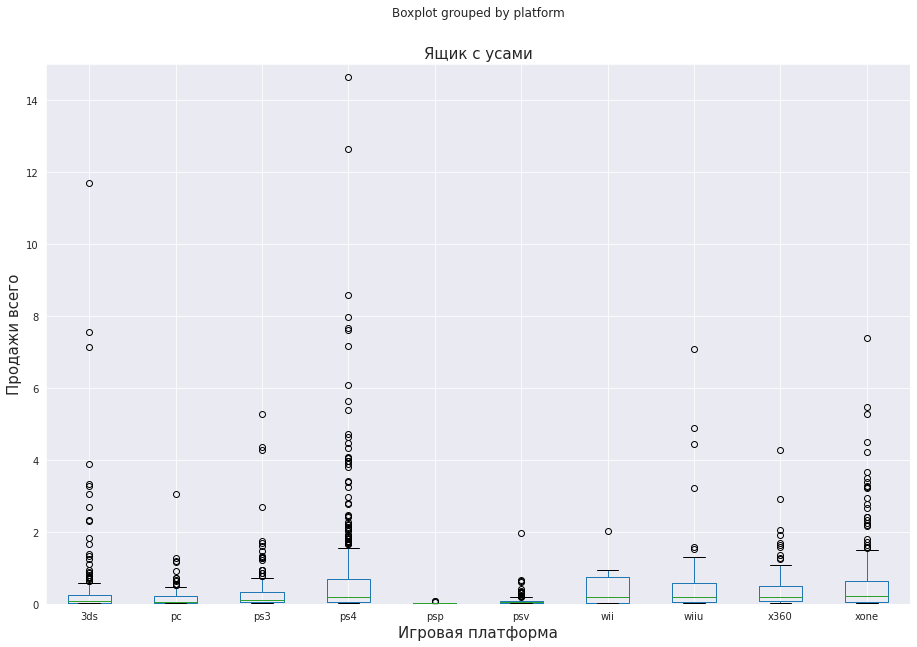

In [32]:
#Рисуем диаграмму размаха со всеми максимумами продаж за период с 2014 года по платформам
print(total_sales_platform['total_sales'].max()) #Максимум продаж
total_sales_platform.boxplot(column = 'total_sales', by = 'platform', figsize = (15,10))
plt.ylim(0,15)
plt.title('Ящик с усами', fontsize = 15)
plt.xlabel('Игровая платформа', fontsize = 15)
plt.ylabel('Продажи всего', fontsize = 15)

**Вывод**

Построили "ящик с усами" и видим, что у всех игровых консолей медиана довольно ниже, чем большинство значений.
У всех игровых консолей есть выбросы, но мы не будем их убирать, т.к. возможно это какие-то успешные игры или возможно бесплатные.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами**

In [33]:
#Создадим переменную с одной из игровых платформ с большими продажами и уберем заглушки по оценкам критиков и пользователей
playstation4 = total_sales_platform[total_sales_platform['platform'] == 'ps4']
playstation4_critic = playstation4.query('critic_score > 0')
playstation4_critic = playstation4_critic.reset_index().rename_axis(None, axis = 1)
playstation4_user = playstation4.query('user_score > 0')
playstation4_user = playstation4_user.reset_index().rename_axis(None, axis = 1)

Корреляция между оценками критиков и продажами: 0.40266141068104083
Корреляция между оценками пользователей и продажами: -0.040131589472697356


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

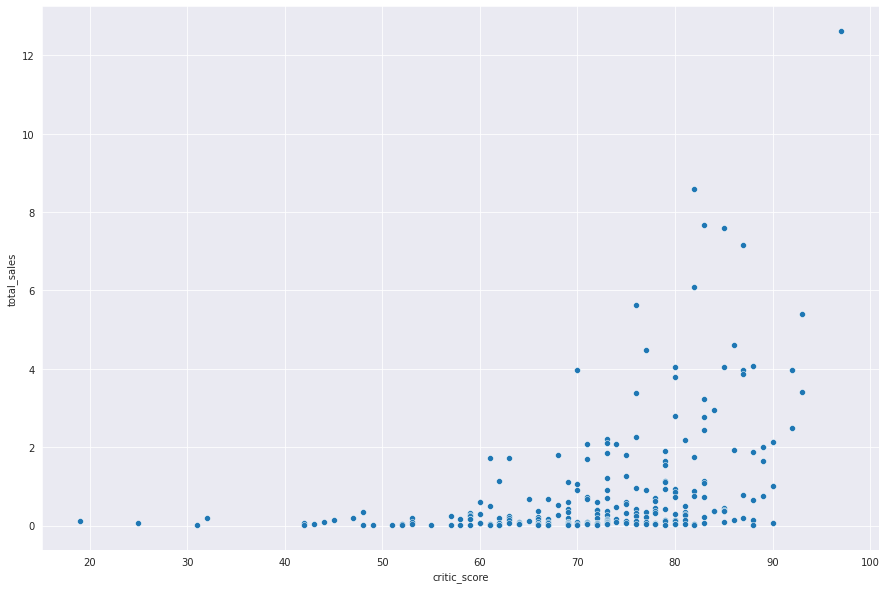

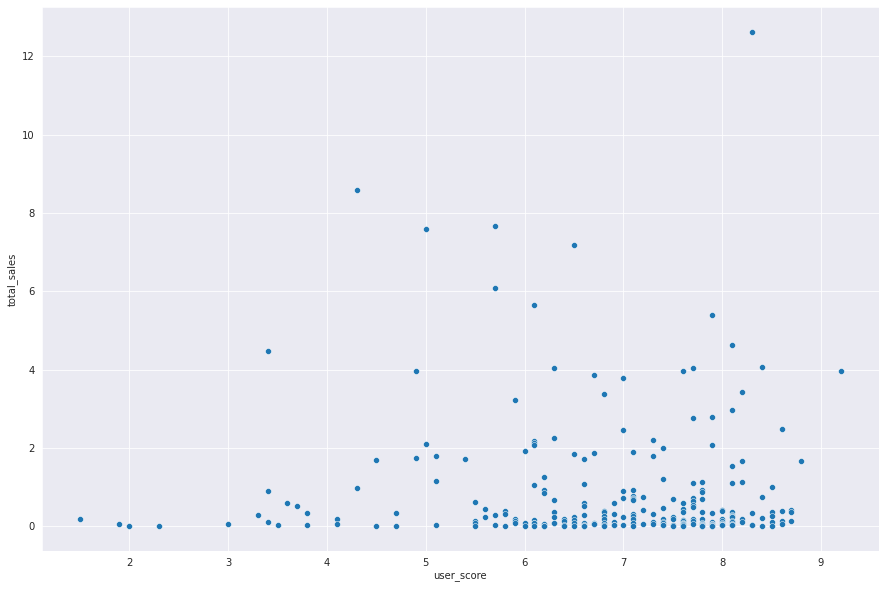

In [34]:
#Ищем корреляцию между оценками пользователей и критиков к продажам
#Построим диаграмму рассеяния по оценке пользователей и критиков
print('Корреляция между оценками критиков и продажами:', playstation4_critic['critic_score'].corr(playstation4_critic['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = playstation4_critic, x = 'critic_score', y = 'total_sales')

print('Корреляция между оценками пользователей и продажами:', playstation4_user['user_score'].corr(playstation4_user['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = playstation4_user, x = 'user_score', y = 'total_sales')

**Вывод**

Мы взяли популярную, и самую большую по продаваемости игр игровую консоль Playstation 4. Отрисовав графики и посчитав корреляцию, можно сделать вывод о том, оценки критиков больше влияют на продажи, чем оценки пользователей. Между оценками пользователей и продажами присутствует обратная корреляция.

**Соотнесем выводы с продажами игр на других платформах.**

Возьмем оставшиеся 4 лучших игровых консолей по продаже. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [35]:
#Создадим переменные с каждой из оставшихся игровых платформ с большими продажами
xboxone = total_sales_platform[total_sales_platform['platform'] == 'xone']
nintendo3ds = total_sales_platform[total_sales_platform['platform'] == '3ds']
playstation3 = total_sales_platform[total_sales_platform['platform'] == 'ps3']
xbox360 = total_sales_platform[total_sales_platform['platform'] == 'x360']

In [36]:
#Уберем заглушки по оценкам критиков и пользователей для xboxone
xboxone_critic = xboxone.query('critic_score > 0')
xboxone_critic = xboxone_critic.reset_index().rename_axis(None, axis = 1)
xboxone_user = xboxone.query('user_score > 0')
xboxone_user = xboxone_user.reset_index().rename_axis(None, axis = 1)

Корреляция между оценками критиков и продажами: 0.42867694370333226
Корреляция между оценками пользователей и продажами: -0.0703839280647581


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

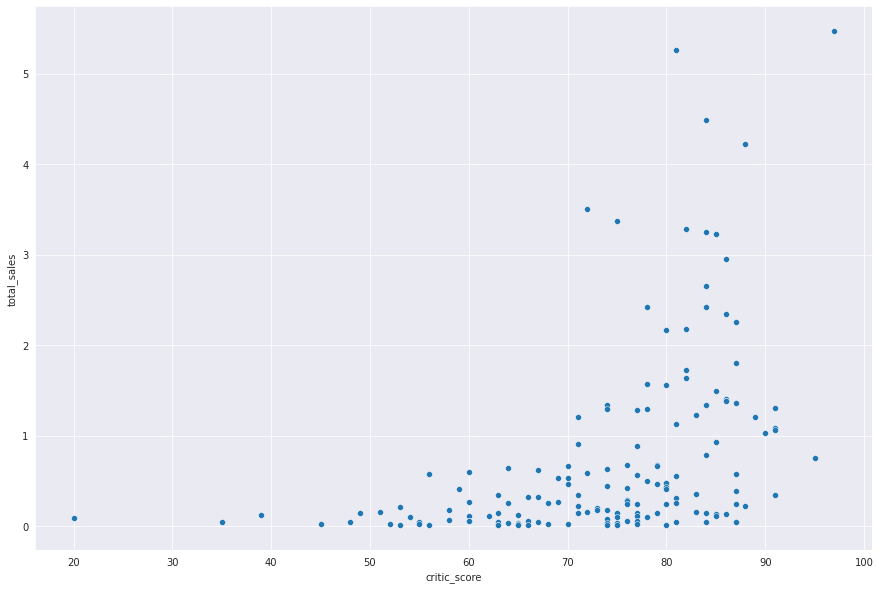

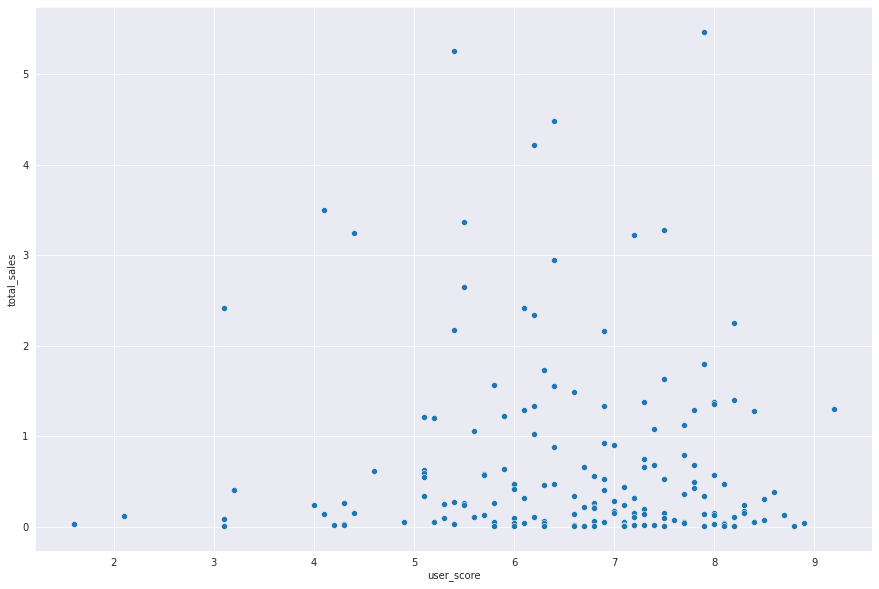

In [37]:
#Ищем корреляцию между оценками пользователей и критиков к продажам для xone
#Построим диаграмму рассеяния по оценке пользователей и критиков для xone
print('Корреляция между оценками критиков и продажами:', xboxone_critic['critic_score'].corr(xboxone_critic['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = xboxone_critic, x = 'critic_score', y = 'total_sales')

print('Корреляция между оценками пользователей и продажами:', xboxone_user['user_score'].corr(xboxone_user['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = xboxone_user, x = 'user_score', y = 'total_sales')

In [38]:
#Уберем заглушки по оценкам критиков и пользователей для Nintendo 3ds
nintendo3ds_critic = nintendo3ds.query('critic_score > 0')
nintendo3ds_critic = nintendo3ds_critic.reset_index().rename_axis(None, axis = 1)
nintendo3ds_user = nintendo3ds.query('user_score > 0')
nintendo3ds_user = nintendo3ds_user.reset_index().rename_axis(None, axis = 1)

Корреляция между оценками критиков и продажами: 0.314117492869051
Корреляция между оценками пользователей и продажами: 0.2151932718527028


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

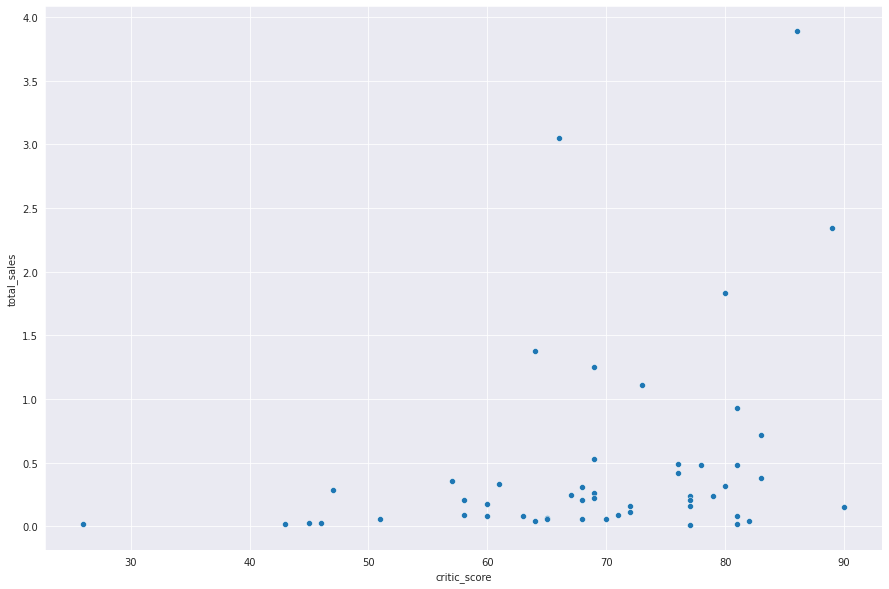

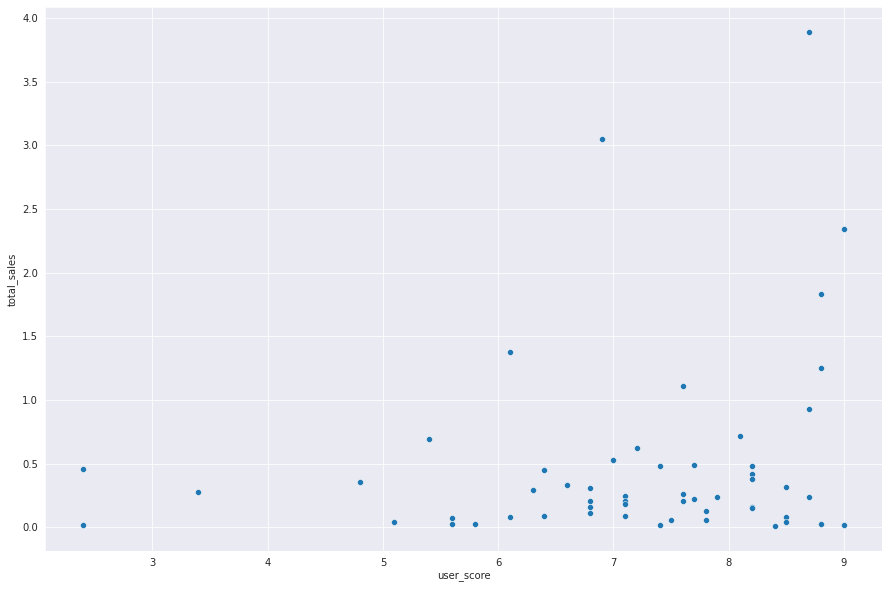

In [39]:
#Ищем корреляцию между оценками пользователей и критиков к продажам для xone
#Построим диаграмму рассеяния по оценке пользователей и критиков для xone
print('Корреляция между оценками критиков и продажами:', nintendo3ds_critic['critic_score'].corr(nintendo3ds_critic['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = nintendo3ds_critic, x = 'critic_score', y = 'total_sales')

print('Корреляция между оценками пользователей и продажами:', nintendo3ds_user['user_score'].corr(nintendo3ds_user['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = nintendo3ds_user, x = 'user_score', y = 'total_sales')

In [40]:
#Уберем заглушки по оценкам критиков и пользователей для Playstation3
playstation3_critic = playstation3.query('critic_score > 0')
playstation3_critic = playstation3_critic.reset_index().rename_axis(None, axis = 1)
playstation3_user = playstation3.query('user_score > 0')
playstation3_user = playstation3_user.reset_index().rename_axis(None, axis = 1)

Корреляция между оценками критиков и продажами: 0.44657460493190704
Корреляция между оценками пользователей и продажами: -0.16676141347662118


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

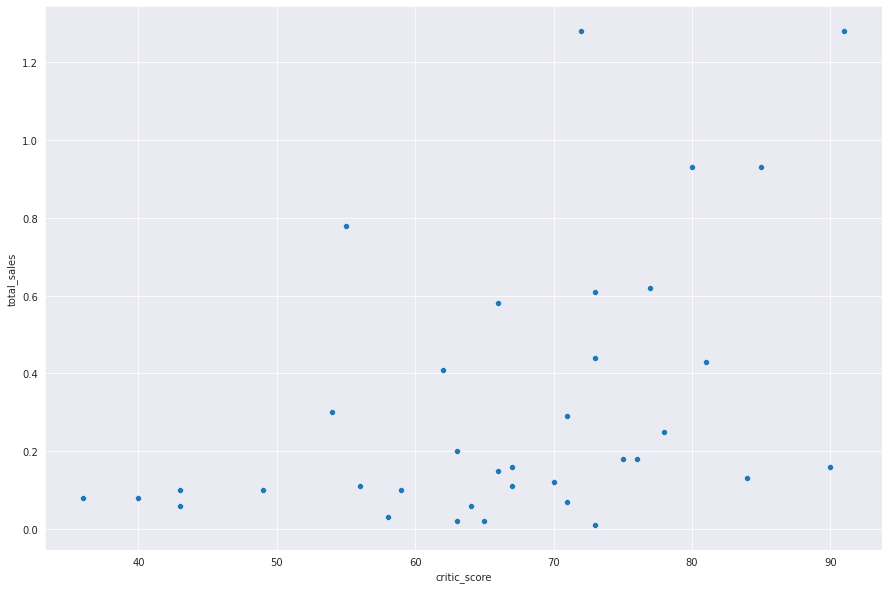

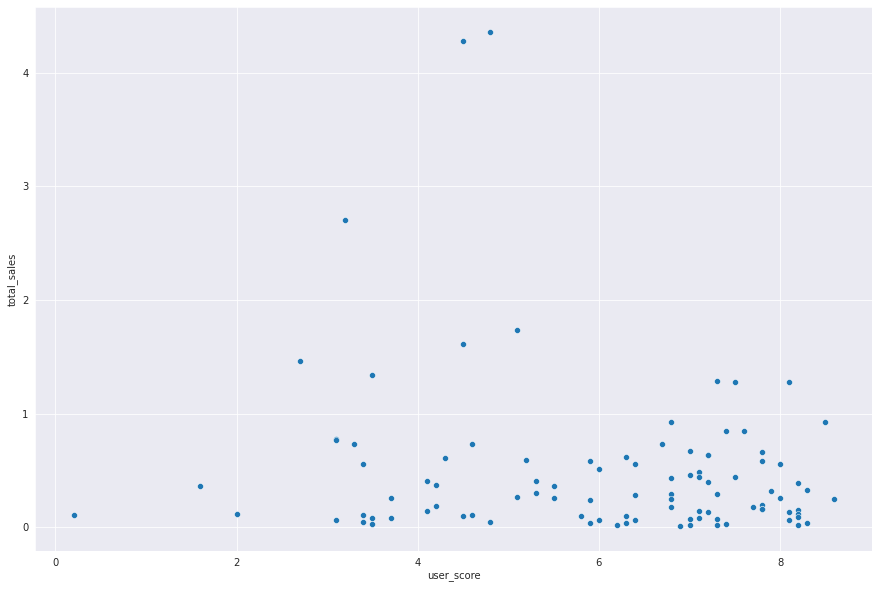

In [41]:
#Ищем корреляцию между оценками пользователей и критиков к продажам для xone
#Построим диаграмму рассеяния по оценке пользователей и критиков для xone
print('Корреляция между оценками критиков и продажами:', playstation3_critic['critic_score'].corr(playstation3_critic['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = playstation3_critic, x = 'critic_score', y = 'total_sales')

print('Корреляция между оценками пользователей и продажами:', playstation3_user['user_score'].corr(playstation3_user['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = playstation3_user, x = 'user_score', y = 'total_sales')

In [42]:
#Уберем заглушки по оценкам критиков и пользователей для Xbox 360
xbox360_critic = xbox360.query('critic_score > 0')
xbox360_critic = xbox360_critic.reset_index().rename_axis(None, axis = 1)
xbox360_user = xbox360.query('user_score > 0')
xbox360_user = xbox360_user.reset_index().rename_axis(None, axis = 1)

Корреляция между оценками критиков и продажами: 0.5257228356581523
Корреляция между оценками пользователей и продажами: -0.138444570945665


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

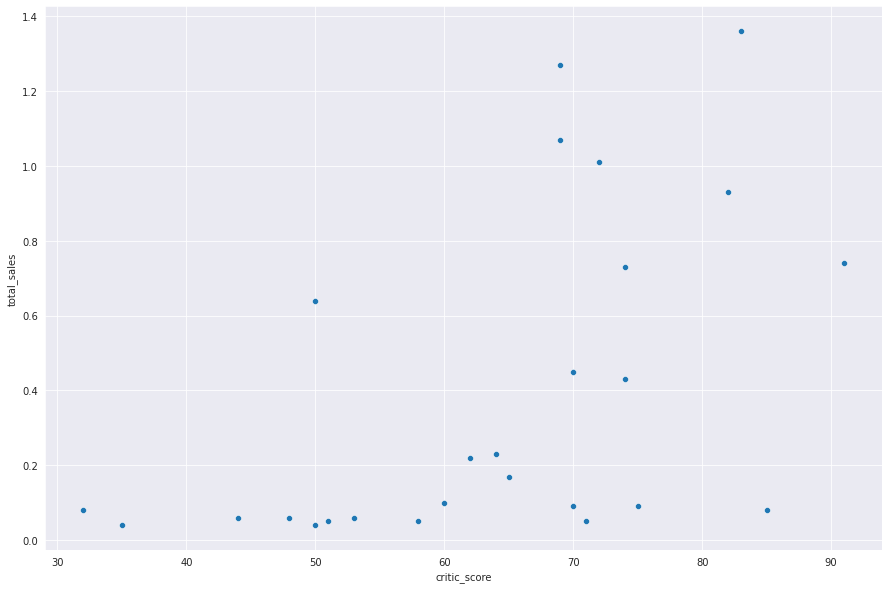

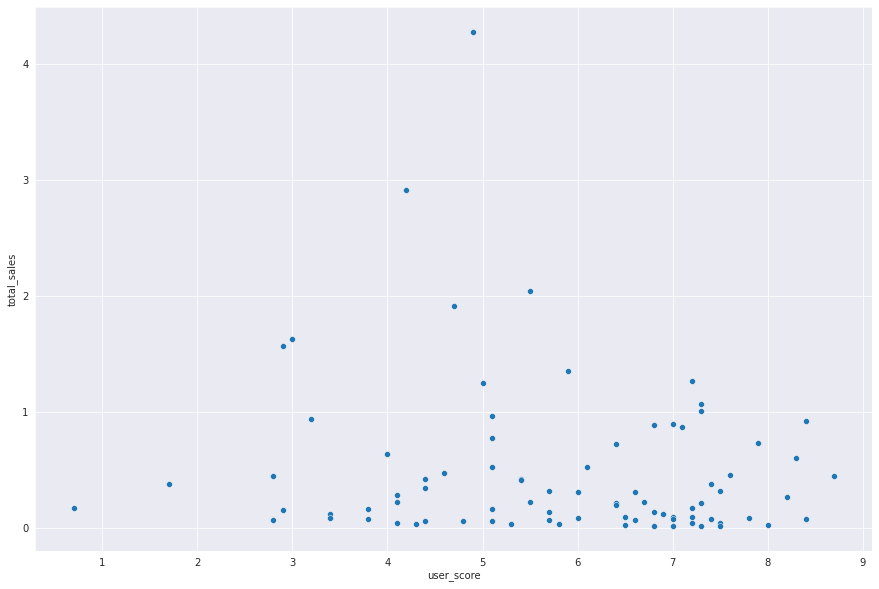

In [43]:
#Ищем корреляцию между оценками пользователей и критиков к продажам для xone
#Построим диаграмму рассеяния по оценке пользователей и критиков для xone
print('Корреляция между оценками критиков и продажами:', xbox360_critic['critic_score'].corr(xbox360_critic['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = xbox360_critic, x = 'critic_score', y = 'total_sales')

print('Корреляция между оценками пользователей и продажами:', xbox360_user['user_score'].corr(xbox360_user['total_sales']))
plt.figure(figsize = (15,10))
sb.scatterplot(data = xbox360_user, x = 'user_score', y = 'total_sales')

**Вывод**

Мы взяли оставшиеся из лучших 5 игровых консолей по продажам, а именно xone, 3ds, ps3, x360. Отрисовав графики и посчитав корреляцию, можно сделать тот же вывод, что и для ps4 - оценки критиков больше влияют на продажи, чем оценки пользователей. Между оценками пользователей и продажами присутствует обратная корреляция.

**Посмотрим на общее распределение игр по жанрам.**

In [44]:
#Выведем все жанры и медиану их общих продаж
genre_and_sales = total_sales_platform.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(by = 'total_sales', ascending = False)
genre_and_sales = genre_and_sales.reset_index().rename_axis(None, axis = 1)
genre_and_sales

,genre,total_sales
0,shooter,0.515
1,sports,0.180
2,platform,0.140
3,fighting,0.125
4,role-playing,0.110
5,simulation,0.100
6,action,0.090
7,misc,0.090
8,racing,0.090
9,strategy,0.060


Text(0, 0.5, 'Продажи игр')

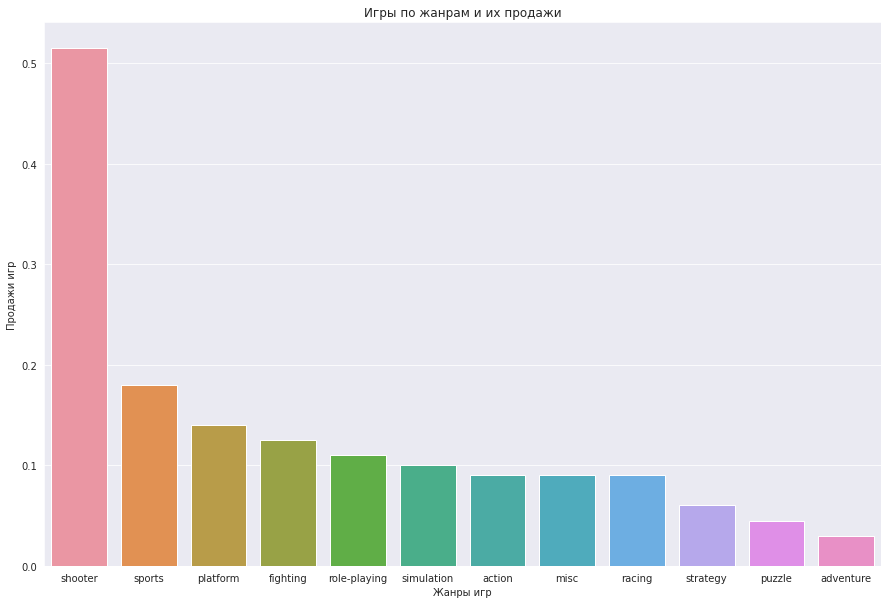

In [45]:
#Посмотрим столбчатую диаграмму чтобы посмотреть наглядно
plt.figure(figsize = (15,10))
sb.barplot(data = genre_and_sales, x = 'genre', y = 'total_sales')
plt.title('Игры по жанрам и их продажи')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи игр')

Text(0, 0.5, 'Продажи всего')

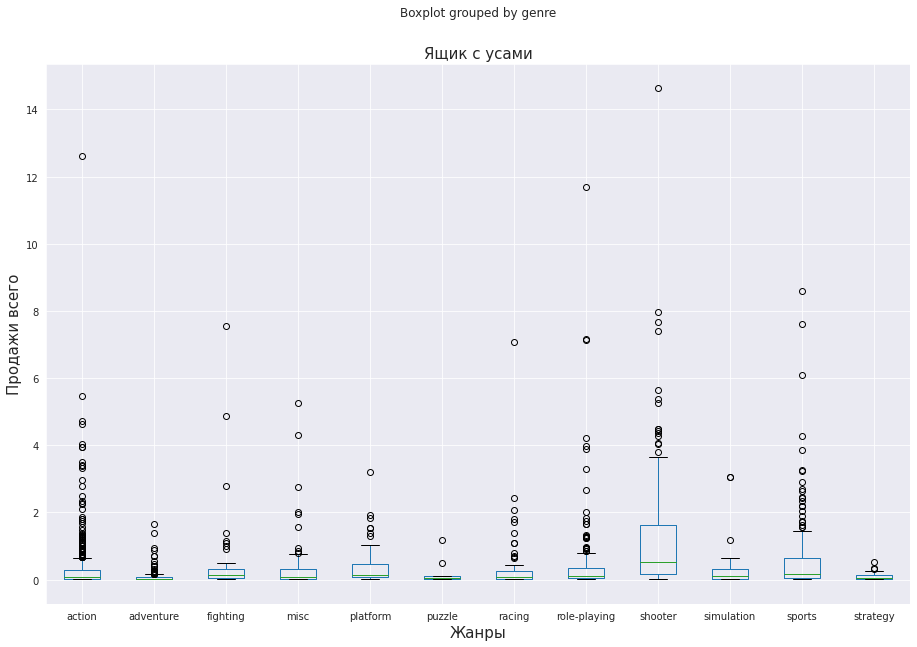

In [46]:
#Рисуем диаграмму размаха со всеми максимумами продаж за период с 2014 года по жанрам
total_sales_platform.boxplot(column = 'total_sales', by = 'genre', figsize = (15,10))
plt.title('Ящик с усами', fontsize = 15)
plt.xlabel('Жанры', fontsize = 15)
plt.ylabel('Продажи всего', fontsize = 15)

**Вывод**

Самые прибыльными жанрами является Shooter. Самыми не продаваемыми - strategy, puzzle, adventure.

**Общий вывод по исследовательскому анализу данных**

**Общий вывод по игровым консолям и продажам за все года.**
- Количество игр на игровых консолях сильно росло начиная с 90-тых годов и вплодь до 2008 года. Это было что-то новое и интересное для людей. С 2008 года пошел спад создаваемых игр на игровые консоли, скорее всего из-за того что начали выпускать мобильные телефоны которые поддерживали качественные игры;
- Обычно игровые консоли актуальны в среднем 8-10 лет;
- Самые популярные игровые консоли за все время - Playstation 2, Xbox360, Playstation 3, Nintendo Wii, Nintendo DS. Многие из них до сих пор актуальны. У них же и самые большие продажи игр.

**Общий вывод по игровым консолям и продажам начиная с 2014 года.**
- Самые популярные игровые консоли по продажам игр - Playstation 4, Xbox one, Nintendo 3ds, Playstation 3, Xbox 360.
- Новые консоли Playstation 4 и Xbox one являются потенциально прибыльными;
- Старые платформы теряют популярность, скорее всего это связано с выходом консолей нового поколения и возможно с большой популярностью мобильной платформы.
- Отрисовав графики и посчитав корреляцию, сделали вывод, что оценки критиков больше влияют на продажи, чем оценки пользователей.
- Самый продаваемый жанр - Shooter. Самый не продаваемый - Adventure.

**Шаг 4. Составим портрет пользователя каждого региона**

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?.

**Определяем самые популярные платформы (топ-5) регионов NA, EU, JP**

In [47]:
#Создадим таблицу с самыми популярными платформами региона NA
na_region_top_platform = total_sales_platform.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
na_region_top_platform = na_region_top_platform.head(5).reset_index().rename_axis(None, axis = 1)
na_region_top_platform

,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05


In [48]:
#Создадим таблицу с самыми популярными платформами региона EU
eu_region_top_platform = total_sales_platform.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
eu_region_top_platform = eu_region_top_platform.head(5).reset_index().rename_axis(None, axis = 1)
eu_region_top_platform

,platform,eu_sales
0,ps4,130.04
1,xone,46.25
2,ps3,25.54
3,pc,18.22
4,3ds,16.12


In [49]:
#Создадим таблицу с самыми популярными платформами региона JP
jp_region_top_platform = total_sales_platform.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
jp_region_top_platform = jp_region_top_platform.head(5).reset_index().rename_axis(None, axis = 1)
jp_region_top_platform

,platform,jp_sales
0,3ds,44.24
1,ps4,15.02
2,psv,14.54
3,ps3,11.22
4,wiiu,7.31


**Вывод**

В NA и EU по игровым консолям лидируют ps4 и xone.

В JP сильно лидирует Nintendo 3ds.

**Определим самые популярные жанры игр в регионах NA, EU, JP.**

In [50]:
#Создадим таблицу с самыми популярными жанрами региона NA и добавим в нее объединенные жанры которые не попали в топ-5
na_region_top_genre = total_sales_platform.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head(5)
na_region_top_genre_1 = total_sales_platform.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
na_region_top_genre.loc['Other genre', 'na_sales'] = na_region_top_genre_1.iloc[5:].sum()[0]
na_region_top_genre

,na_sales
genre,
shooter,79.02
action,72.59
sports,46.13
role-playing,33.47
misc,15.05
Other genre,37.86


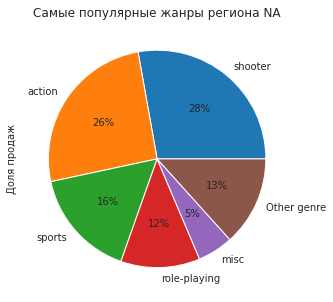

In [51]:
#Построим круговую диаграмму с самыми популярными жанрами региона NA
na_region_top_genre.plot(kind = 'pie', y = 'na_sales', legend = False, figsize = (15,5), autopct = '%.0f%%')
plt.title('Самые популярные жанры региона NA')
plt.ylabel('Доля продаж')
plt.show()

In [52]:
#Создадим таблицу с самыми популярными жанрами региона EU и добавим в нее объединенные жанры которые не попали в топ-5
eu_region_top_genre = total_sales_platform.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head(5)
eu_region_top_genre_1 = total_sales_platform.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
eu_region_top_genre.loc['Other genre', 'eu_sales'] = eu_region_top_genre_1.iloc[5:].sum()[0]
eu_region_top_genre

,eu_sales
genre,
action,74.93
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13
Other genre,42.45


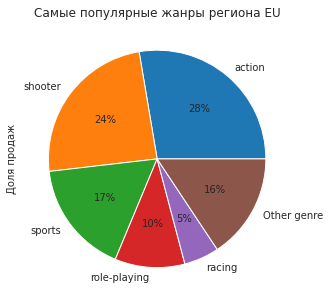

In [53]:
#Построим круговую диаграмму с самыми популярными жанрами региона EU
eu_region_top_genre.plot(kind = 'pie', y = 'eu_sales', legend = False, figsize = (15,5), autopct = '%.0f%%')
plt.title('Самые популярные жанры региона EU')
plt.ylabel('Доля продаж')
plt.show()

In [54]:
#Создадим таблицу с самыми популярными жанрами региона JP и добавим в нее объединенные жанры которые не попали в топ-5
jp_region_top_genre = total_sales_platform.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head(5)
jp_region_top_genre_1 = total_sales_platform.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
jp_region_top_genre.loc['Other genre', 'jp_sales'] = jp_region_top_genre_1.iloc[5:].sum()[0]
jp_region_top_genre

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87
Other genre,15.50


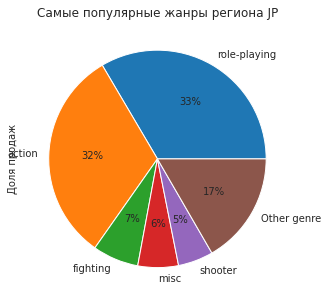

In [55]:
#Построим круговую диаграмму с самыми популярными жанрами региона JP
jp_region_top_genre.plot(kind = 'pie', y = 'jp_sales', legend = False, figsize = (15,5), autopct = '%.0f%%')
plt.title('Самые популярные жанры региона JP')
plt.ylabel('Доля продаж')
plt.show()

**Вывод**

В NA и EU самые популярные жанры игр почти схожи. Shooter и Action лидируют.

В JP с большим отрывом лидируют Role-playing и Action.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Text(0, 0.5, 'Количество продаж')

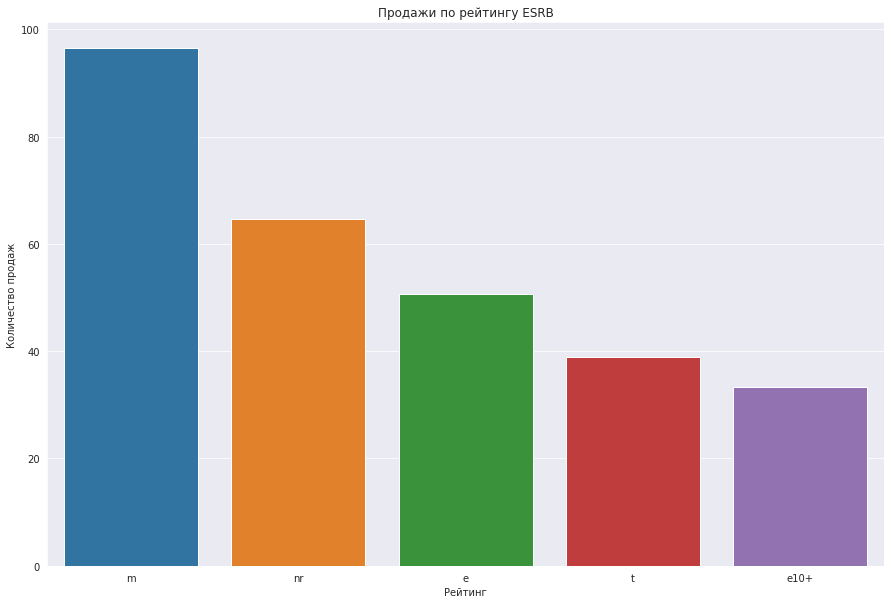

In [56]:
#Построим столбчатые графики с рейтингами ESRB по продажам игр в NA
na_sales_rating = total_sales_platform.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
plt.figure(figsize = (15,10))
sb.barplot(x = na_sales_rating.index, y = na_sales_rating['na_sales'])
plt.title("Продажи по рейтингу ESRB")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

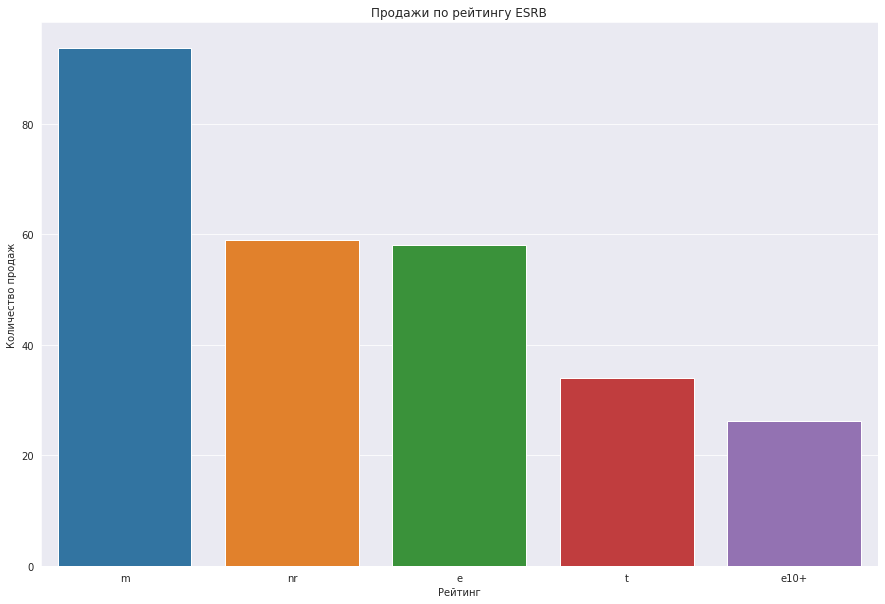

In [57]:
#Построим столбчатые графики с рейтингами ESRB по продажам игр в EU
eu_sales_rating = total_sales_platform.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
plt.figure(figsize = (15,10))
sb.barplot(x = eu_sales_rating.index, y = eu_sales_rating['eu_sales'])
plt.title("Продажи по рейтингу ESRB")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

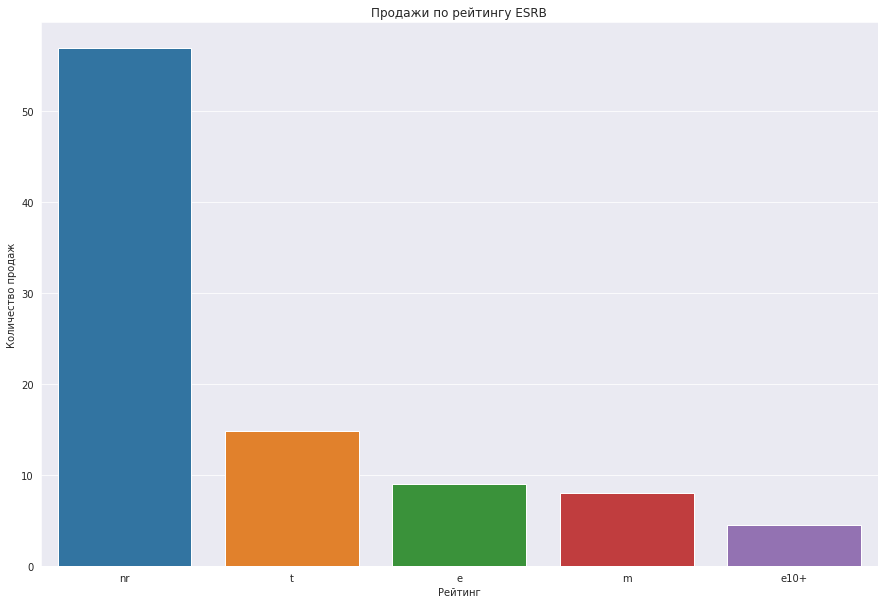

In [58]:
#Построим столбчатые графики с рейтингами ESRB по продажам игр в JP
jp_sales_rating = total_sales_platform.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
plt.figure(figsize = (15,10))
sb.barplot(x = jp_sales_rating.index, y = jp_sales_rating['jp_sales'])
plt.title("Продажи по рейтингу ESRB")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

**Вывод**

По столбчатым диаграммам видно, что в NA и EU сильно влияет на продажи рейтинг M - для лиц, старше 17 лет.
В JP много продаж игр у которых нет рейтинга. Это связано с тем, что рейтинг ESRB предназначен для маркировки игр для США и Канады. Далее более продаваемыми являются игры рейтинга E - Для всех возрастов, и T - для лиц, старше 13 лет.

**Общий вывод по составленным портретам пользователя каждого региона**

North America:
1. Популярные игровые консоли: ps4, xone.
2. Популярные жанры игр: shooter, action.
3. Самые большие продажи по рейтингам: M - для лиц, старше 17 лет.

Europe:
1. Популярные игровые консоли: ps4, xone.
2. Популярные жанры игр: shooter, action.
3. Самые большие продажи по рейтингам: M - для лиц, старше 17 лет.

Japan:
1. Популярные игровые консоли: 3ds, ps4.
2. Популярные жанры игр: role-playing, action.
3. Самые большие продажи по рейтингам: E - для всех возрастов, и T - для лиц, старше 13 лет.

**Шаг 5. Проверим гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформулируем нулевую и альтернативную гипотезу.

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [59]:
#Создадим переменные с данными по Xbox One и PC с рейтингом пользователей выше 0
#Проверим гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
#Alpha будет равна .01
xbox_one_user = total_sales_platform[(total_sales_platform['platform'] == 'xone') & (total_sales_platform['user_score'] > 0)]['user_score']
pc_user = total_sales_platform[(total_sales_platform['platform'] == 'pc') & (total_sales_platform['user_score'] > 0)]['user_score']
alpha = .01
result = st.ttest_ind(xbox_one_user, pc_user, equal_var = False)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.139237120435483
Не получилось отвергнуть нулевую гипотезу


In [60]:
#Выведем средние значения
print('Средняя пользовательская оценка для Xbox one:', xbox_one_user.mean())
print('Средняя пользовательская оценка для PC:', pc_user.mean())

Средняя пользовательская оценка для Xbox one: 6.594545454545456
Средняя пользовательская оценка для PC: 6.316260162601626


**Вывод**

Мы не можем отвергнуть гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Сформулируем нулевую и альтернативную гипотезу.

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые;
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [61]:
#Создадим переменные с данными по жанрам Action и Sports с рейтингом пользователей выше 0
#Проверим гипотезу о том что средние пользовательские рейтинги по жанрам Action и Sports разные.
#Alpha будет равна .01
action_user = total_sales_platform[(total_sales_platform['genre'] == 'action') & (total_sales_platform['user_score'] > 0)]['user_score']
sports_user = total_sales_platform[(total_sales_platform['genre'] == 'sports') & (total_sales_platform['user_score'] > 0)]['user_score']
alpha = .01
result = st.ttest_ind(action_user, sports_user, equal_var = False)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


In [62]:
#Выведем средние значения
print('Средняя пользовательская оценка жанра Action:', action_user.mean())
print('Средняя пользовательская оценка жанра Sports:', sports_user.mean())

Средняя пользовательская оценка жанра Action: 6.766442953020134
Средняя пользовательская оценка жанра Sports: 5.2251968503937


**Вывод**

Отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Общий вывод по гипотезам**

Мы использовали T-тест, ведь нам нужно проверить гипотезы у двух независимых выборок.

Сформировали нулевые и альтернативные гипотезы исходя из того, что нулевая гипотеза всегда формируется так, чтобы использовался знак равенства, а альтернативная гипотеза должна противоречить нулевой гипотезе.

Мы не смогли отвергнуть гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC одинаковые.

Отвергли гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Шаг 6. Общий вывод**

1. Количество игр на игровых консолях сильно росло начиная с 90-тых годов и вплодь до 2008 года. Это было что-то новое и интересное для людей. С 2008 года пошел спад создаваемых игр на игровые консоли, скорее всего из-за того что начали выпускать мобильные телефоны которые поддерживали качественные игры.
2. Обычно игровые консоли актуальны в среднем 8-10 лет.
3. Самые популярные игровые консоли за все время - Playstation 2, Xbox 360, Playstation 3, Nintendo Wii, Nintendo DS. Многие из них до сих пор актуальны. У них же и самые большие продажи игр.
4. Самые популярные игровые консоли по продажам игр за последние 3 года - Playstation 4, Xbox One, Nintendo 3ds, Playstation 3, Xbox 360;
5. Старые платформы теряют популярность, скорее всего это связано с выходом консолей нового поколения и возможно с большой популярностью мобильной платформы.
6. Оценки критиков больше влияют на продажи, чем оценки пользователей.
7. Самый продаваемый жанр за последние 3 года - Shooter. Самый не продаваемый - Adventure.

По данным можно составить портрет пользователя каждого региона за последние 3 года.

North America и Europe схожи по портретам пользователя - это пользователь с игровой консолью от Microsoft или Sony, который играет в Shooter или Action, для лиц, старше 17 лет.

А пользователь из Japan - это пользователь с портативной приставкой, который играет в Role-playing или Action для всех возрастов или для лиц, старше 13 лет.

**Гипотезы.**

Мы не отвергли гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC одинаковые. Все же пользовательские рейтинги по играм этих платформ схожи. 

Отвергли гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Пользовательские рейтинги для этих жанров разные.

**Рекомендации для компании на 2017 год для повышения продаж.**

Для пользователей NA и EU:
1. Делать упор на новые игровые консоли Playstation 4, Xbox One.
2. Выставлять популярные жанры игр - Shooter и Action.
3. Рейтинг игр должен быть "Старше 17 лет" или "Для всех".

Для пользователей JP:
1. Делать упор на портативную приставку Nintendo 3ds.
2. Выставлять популярные жанры игр - Role-playing и Action.
3. Рейтинг игр должен быть "Для всех" или "Для лиц, старше 13 лет".
**Общая рекомендация:**

Обратить внимание по межплатформенные игры. Компьютеры еще долго будут актуальны, а мобильные платформы и вовсе еще новые. Думаю что со временем людям будет интереснее совсем перейти на мобильные игры.